In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-auction-prices/car_prices.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("/kaggle/input/used-car-auction-prices/car_prices.csv", quotechar='"', delimiter=',', encoding='utf-8', on_bad_lines='warn')

/tmp/ipykernel_166/22748469.py:1: ParserWarning: Skipping line 408163: expected 16 fields, saw 17
Skipping line 417837: expected 16 fields, saw 17
Skipping line 421291: expected 16 fields, saw 17
Skipping line 424163: expected 16 fields, saw 17

  data = pd.read_csv("/kaggle/input/used-car-auction-prices/car_prices.csv", quotechar='"', delimiter=',', encoding='utf-8', on_bad_lines='warn')
/tmp/ipykernel_166/22748469.py:1: ParserWarning: Skipping line 427042: expected 16 fields, saw 17
Skipping line 427045: expected 16 fields, saw 17
Skipping line 434426: expected 16 fields, saw 17
Skipping line 444503: expected 16 fields, saw 17
Skipping line 453796: expected 16 fields, saw 17

  data = pd.read_csv("/kaggle/input/used-car-auction-prices/car_prices.csv", quotechar='"', delimiter=',', encoding='utf-8', on_bad_lines='warn')
/tmp/ipykernel_166/22748469.py:1: ParserWarning: Skipping line 461599: expected 16 fields, saw 17
Skipping line 461614: expected 16 fields, saw 17

  data = pd.read_cs

In [4]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [15]:
data.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558810,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [5]:
data.shape

(558811, 16)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [18]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [19]:
data.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

****Trim:**** In simple terms, a car trim refers to a version or level of a specific car model that comes with a particular set of features and equipment. Think of it as different "packages" offered for the same car model, with each package offering a different mix of features and options.

****Odometer:**** An odometer is a device in a car that displays the total distance a vehicle has traveled. It's essentially a mileage counter, showing the accumulated mileage since the car was manufactured.

****mmr:**** In the context of car valuation, MMR refers to Manheim Market Report, a used car valuation database. It provides average values for used vehicles, and these values are adjusted for seasonal trends and market conditions. When someone says "MMR on a car," they're likely talking about the Manheim Market Report's assessment of the car's value. 

****vin:**** A Vehicle Identification Number (VIN) is a unique 17-character code, assigned by the manufacturer, that identifies a specific vehicle

In [20]:
data.duplicated().sum()

0

# EDA

In [21]:
data['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

In [22]:
data['year'].nunique()

34

In [23]:
data['year'].value_counts()

year
2012    102315
2013     98168
2014     81070
2011     48548
2008     31502
2007     30845
2006     26913
2010     26485
2005     21394
2009     20594
2004     17342
2003     13281
2002      9715
2015      9411
2001      6468
2000      5227
1999      3363
1998      2149
1997      1546
1996       851
1995       711
1994       392
1993       205
1992       132
1991        67
1990        49
1989        20
1986        11
1988        11
1985        10
1987         8
1984         5
1982         2
1983         1
Name: count, dtype: int64

In [24]:
data['make'].nunique()

96

In [25]:
data['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

In [26]:
data['make'].value_counts()

make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
airstream         1
ford tk           1
chev truck        1
hyundai tk        1
Lotus             1
Name: count, Length: 96, dtype: int64

In [27]:
data['model'].nunique()

973

In [28]:
data['model'].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       nan, 'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',


In [29]:
data['model'].value_counts()

model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
rrs               1
golf              1
g500              1
tahoe             1
458 Italia        1
Name: count, Length: 973, dtype: int64

In [30]:
data['trim'].nunique()

1975

In [31]:
data['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

In [32]:
data['trim'].value_counts()

trim
Base                 55817
SE                   43648
LX                   20757
Limited              18356
LT                   16915
                     ...  
xls                      1
4x2 reg silverado        1
awd v8 limited           1
4x2 v6 limited           1
Power Wagon              1
Name: count, Length: 1975, dtype: int64

In [33]:
data['body'].nunique()

86

In [34]:
data['body'].unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', nan, 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'van', 'regular-cab', 'g sedan', 'g coupe',
       'hatchback', 'king cab', 'supercrew', 'g convertible', 'coupe',
       'crew cab', 'wagon', 'double cab', 'e-series van', 'regular cab',
       'quad cab', 'g37 convertible', 'supercab', 'extended cab',
       'crew

In [35]:
data['body'].value_counts()

body
Sedan          199437
SUV            119292
sedan           41906
suv             24552
Hatchback       21380
                ...  
g37 coupe           1
cab plus 4          1
CTS-V Wagon         1
Ram Van             1
cts wagon           1
Name: count, Length: 86, dtype: int64

In [36]:
data['transmission'].nunique()

2

In [37]:
data['transmission'].unique()

array(['automatic', nan, 'manual'], dtype=object)

In [38]:
data['transmission'].value_counts()

transmission
automatic    475914
manual        17544
Name: count, dtype: int64

In [39]:
data['state'].nunique()

38

In [40]:
data['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [41]:
data['state'].value_counts()

state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12027
md    11158
wi     9851
mn     9429
az     8741
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: count, dtype: int64

In [42]:
data['condition'].nunique()

41

In [43]:
data['condition'].unique()

array([5. , 4.5, 4.1, 4.3, 1. , 3.4, 2. , 4.2, 3. , 4.8, nan, 4.9, 1.7,
       1.9, 2.9, 3.8, 4.4, 4.7, 3.2, 4. , 2.5, 3.7, 3.9, 3.1, 2.8, 4.6,
       3.6, 3.5, 2.6, 2.1, 2.2, 2.7, 2.4, 3.3, 2.3, 1.5, 1.6, 1.8, 1.2,
       1.4, 1.1, 1.3])

In [44]:
data['condition'].value_counts()

condition
1.9    42281
3.5    26750
3.7    25938
4.4    25514
4.3    24937
4.2    24328
3.6    23144
4.1    23073
2.0    20790
4.0    19922
3.9    19920
2.8    19178
2.9    18928
3.8    18723
3.4    17398
2.7    16351
4.9    13099
4.8    12712
4.6    12634
2.5    12561
4.5    12313
2.6    11912
4.7    11363
5.0    11222
3.0    10803
3.3    10619
3.2     9962
2.4     9326
3.1     9222
2.1     9199
2.3     8188
1.0     7364
2.2     6057
1.8      323
1.7      243
1.6      178
1.5      144
1.4      134
1.2       95
1.1       87
1.3       82
Name: count, dtype: int64

In [45]:
data['odometer'].nunique()

172277

In [46]:
data['odometer'].describe()

count    558717.000000
mean      68323.195797
std       53397.752933
min           1.000000
25%       28374.000000
50%       52256.000000
75%       99112.000000
max      999999.000000
Name: odometer, dtype: float64

In [47]:
data['color'].nunique()

20

In [48]:
data['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [49]:
data['color'].value_counts()

color
black        110970
white        106673
silver        83389
gray          82857
blue          51139
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
Name: count, dtype: int64

In [50]:
data['interior'].nunique()

17

In [51]:
data['interior'].unique()

array(['black', 'beige', 'tan', '—', 'gray', 'brown', 'burgundy', 'white',
       nan, 'silver', 'off-white', 'blue', 'red', 'yellow', 'green',
       'purple', 'orange', 'gold'], dtype=object)

In [52]:
data['interior'].value_counts()

interior
black        244325
gray         178578
beige         59758
tan           44093
—             17076
brown          8640
red            1359
blue           1138
silver         1099
off-white       480
purple          339
gold            324
white           252
green           245
burgundy        191
orange          145
yellow           20
Name: count, dtype: int64

In [53]:
data['seller'].nunique()

14264

In [54]:
data['seller'].value_counts()

seller
nissan-infiniti lt                  19693
ford motor credit company,llc       19162
the hertz corporation               18299
santander consumer                  15285
avis corporation                    12540
                                    ...  
financeco of kansas                     1
r t m motors                            1
navigant credit union                   1
columbus preowned auto sales llc        1
i -5 uhlmann rv                         1
Name: count, Length: 14264, dtype: int64

In [55]:
data['mmr'].nunique()

1101

In [56]:
data['mmr'].describe()

count    558811.000000
mean      13769.324646
std        9679.874607
min          25.000000
25%        7100.000000
50%       12250.000000
75%       18300.000000
max      182000.000000
Name: mmr, dtype: float64

In [57]:
data['sellingprice'].nunique()

1887

In [58]:
data['sellingprice'].describe()

count    558811.000000
mean      13611.262461
std        9749.656919
min           1.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

Have to change saledate column trype to datetime

In [6]:
data['saledate'] = pd.to_datetime(data['saledate'], errors='coerce', utc=True)

/tmp/ipykernel_166/2112380579.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['saledate'] = pd.to_datetime(data['saledate'], errors='coerce', utc=True)


In [7]:
data['saleyear'] = data['saledate'].dt.year
data['salemonth'] = data['saledate'].dt.month

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          558811 non-null  int64              
 1   make          548510 non-null  object             
 2   model         548412 non-null  object             
 3   trim          548160 non-null  object             
 4   body          545616 non-null  object             
 5   transmission  493458 non-null  object             
 6   vin           558811 non-null  object             
 7   state         558811 non-null  object             
 8   condition     547017 non-null  float64            
 9   odometer      558717 non-null  float64            
 10  color         558062 non-null  object             
 11  interior      558062 non-null  object             
 12  seller        558811 non-null  object             
 13  mmr           558811 non-null  int64        

In [62]:
data['priceDifference'] = data['sellingprice'] - data['mmr']

In [63]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,salemonth,priceDifference
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00,2014,12,1000
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16 04:30:00+00:00,2014,12,700
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015-01-14 20:30:00+00:00,2015,1,-1900
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015-01-28 20:30:00+00:00,2015,1,250
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,2014-12-18 04:30:00+00:00,2014,12,1000


# Data Visualization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


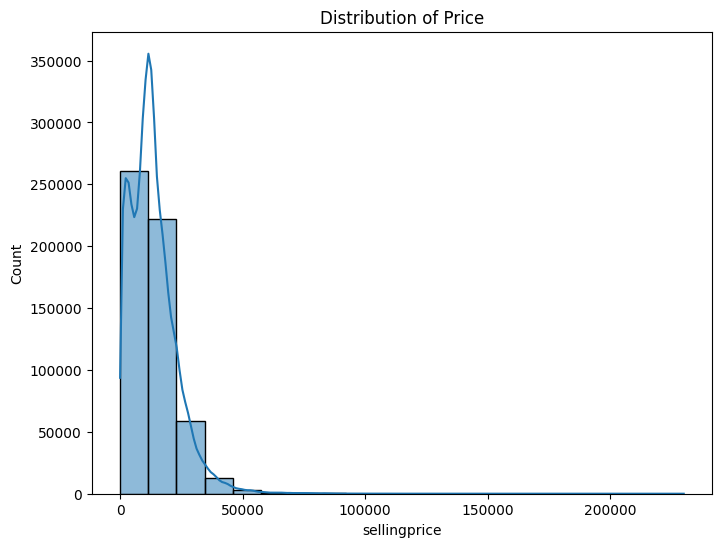

In [64]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=data['sellingprice'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


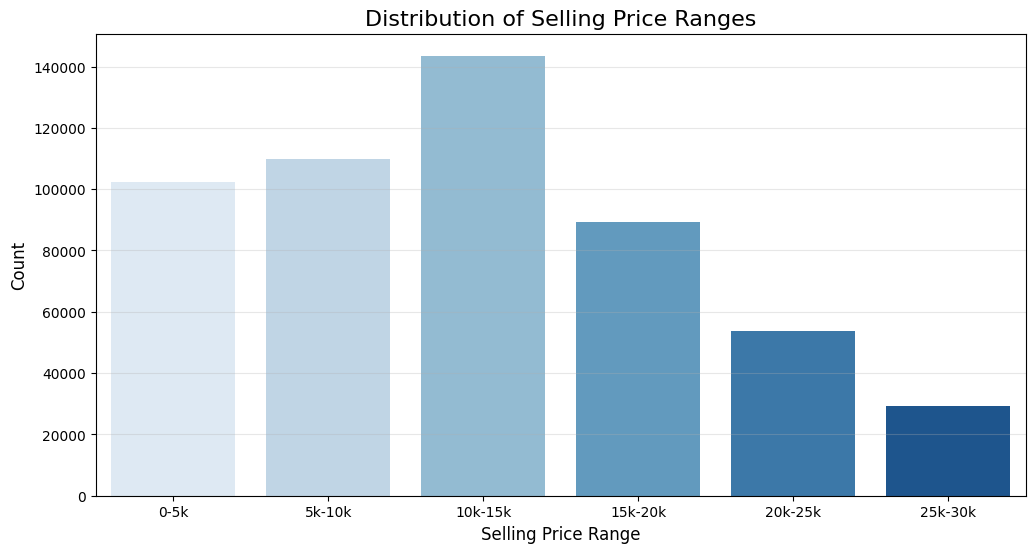

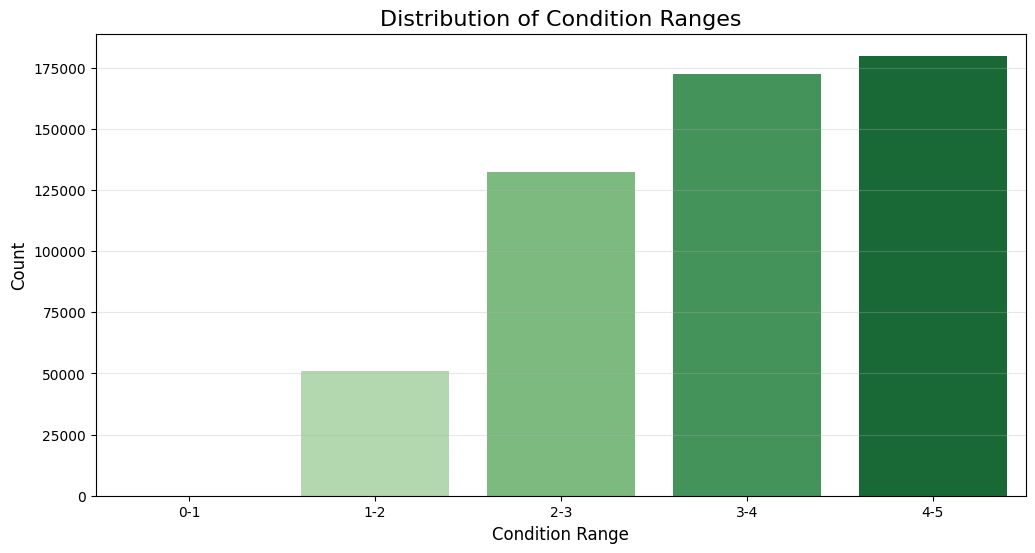

In [65]:
selling_price_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
selling_price_labels = ["0-5k", "5k-10k", "10k-15k", "15k-20k", "20k-25k", "25k-30k"]

condition_bins = [0, 1, 2, 3, 4, 5]
condition_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]

data['sellingprice_range'] = pd.cut(data['sellingprice'], bins=selling_price_bins, labels=selling_price_labels, right=False)
data['condition_range'] = pd.cut(data['condition'], bins=condition_bins, labels=condition_labels, right=False)

# Plotting Selling Price Range Histogram
plt.figure(figsize=(12, 6))
sns.countplot(x='sellingprice_range', data=data, palette='Blues', order=selling_price_labels)
plt.title('Distribution of Selling Price Ranges', fontsize=16)
plt.xlabel('Selling Price Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Plotting Condition Range Histogram
plt.figure(figsize=(12, 6))
sns.countplot(x='condition_range', data=data, palette='Greens', order=condition_labels)
plt.title('Distribution of Condition Ranges', fontsize=16)
plt.xlabel('Condition Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


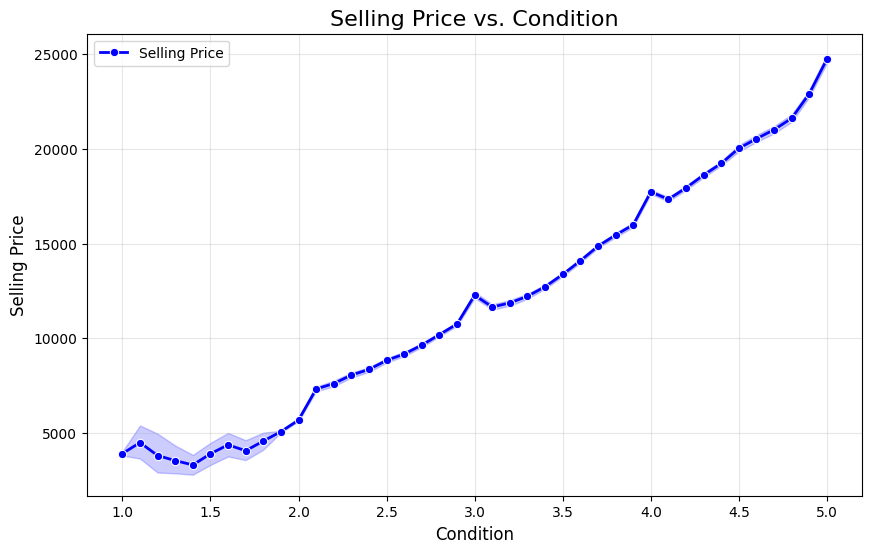

In [66]:
# Plotting Selling Price vs. Condition as a Line Graph

plt.figure(figsize=(10, 6))
sns.lineplot(x='condition', y='sellingprice', data=data, color='blue', marker='o', linewidth=2, label='Selling Price')

plt.title('Selling Price vs. Condition', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


****There is linear relationship between Condition and SellingPrice****

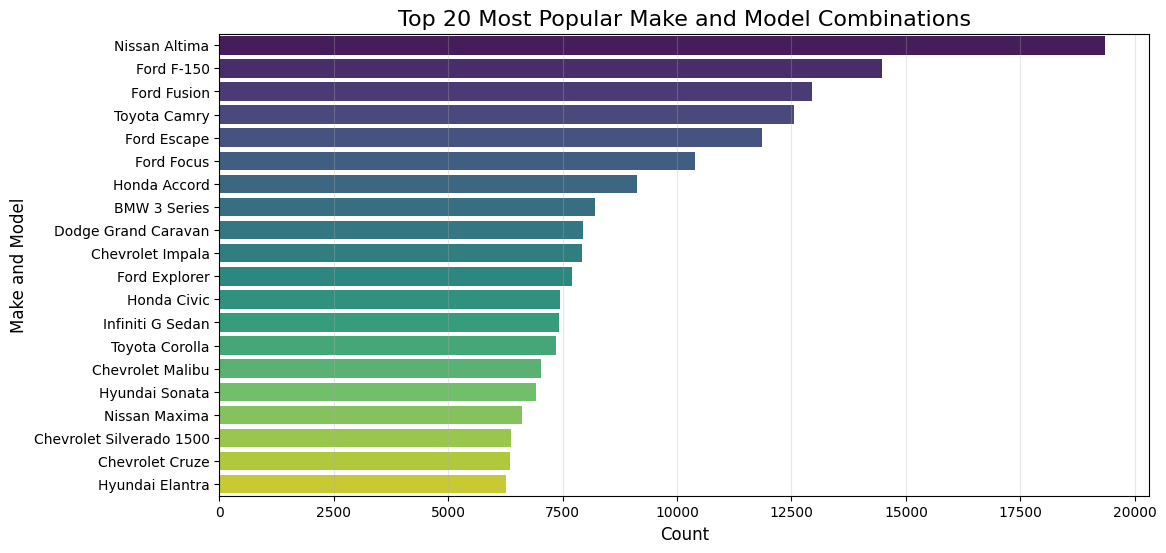

In [67]:
# Plot to visualize Most Popular Make and Model Combination

data['make_model'] = data['make'] + " " + data['model']

make_model_counts = data['make_model'].value_counts().reset_index()
make_model_counts.columns = ['make_model', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='make_model', data=make_model_counts.head(20), palette='viridis')
plt.title('Top 20 Most Popular Make and Model Combinations', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Make and Model', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

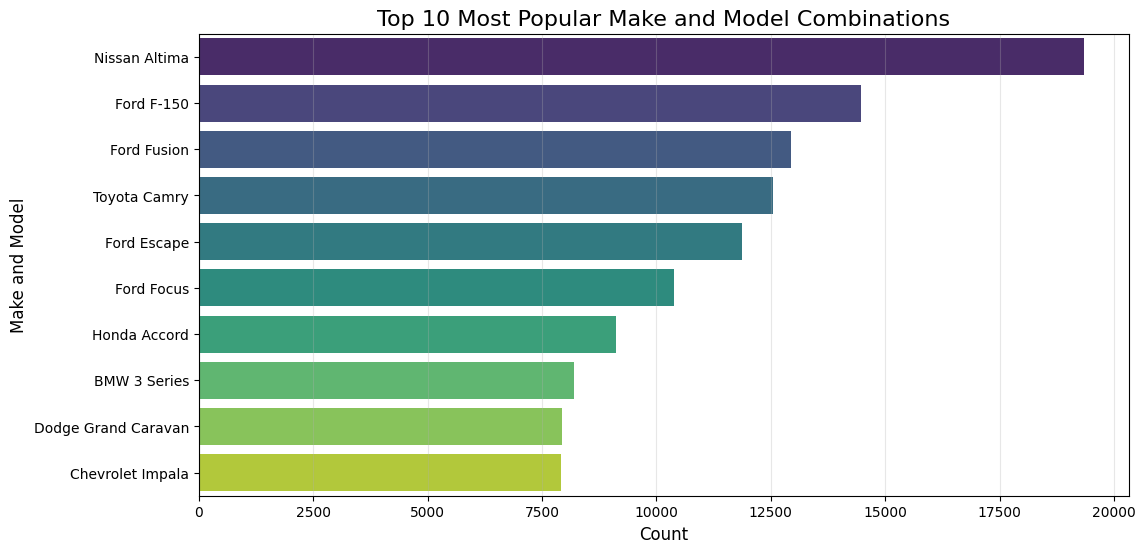

In [68]:
# Plot to visualize Most Popular Make and Model Combination

data['make_model'] = data['make'] + " " + data['model']

make_model_counts = data['make_model'].value_counts().reset_index()
make_model_counts.columns = ['make_model', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='make_model', data=make_model_counts.head(10), palette='viridis')
plt.title('Top 10 Most Popular Make and Model Combinations', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Make and Model', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()


In [ ]:
# Combine make & model
data['make_model'] = data['make'] + " " + data['model']

# Average selling price per make‑model → DataFrame
avg_prices_by_car = (
    data.groupby('make_model', as_index=False)['sellingprice']
        .mean()
        .rename(columns={'sellingprice': 'avg_price'})
        .sort_values('avg_price', ascending=True)
)

# Grab the top‑10
top10 = avg_prices_by_car.head(10)

# Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    x='avg_price',
    y='make_model',
    palette='viridis',
    orient='h'          # horizontal bars
)

plt.title('Top 10 Make‑Model Combinations by Average Selling Price', fontsize=16)
plt.xlabel('Average Price', fontsize=12)
plt.ylabel('Make & Model', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.gca().invert_yaxis()   # highest price at top
plt.tight_layout()
plt.show()


In [ ]:
# Treemap plot for top 10 make-model combinations

import squarify 

plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=make_model_counts['count'].head(10), 
    label=make_model_counts['make_model'].head(10), 
    alpha=0.8, 
    color=plt.cm.viridis(range(10))
)
plt.title('Treemap of Top 10 Make and Model Popularity', fontsize=16)
plt.axis('off')
plt.show()

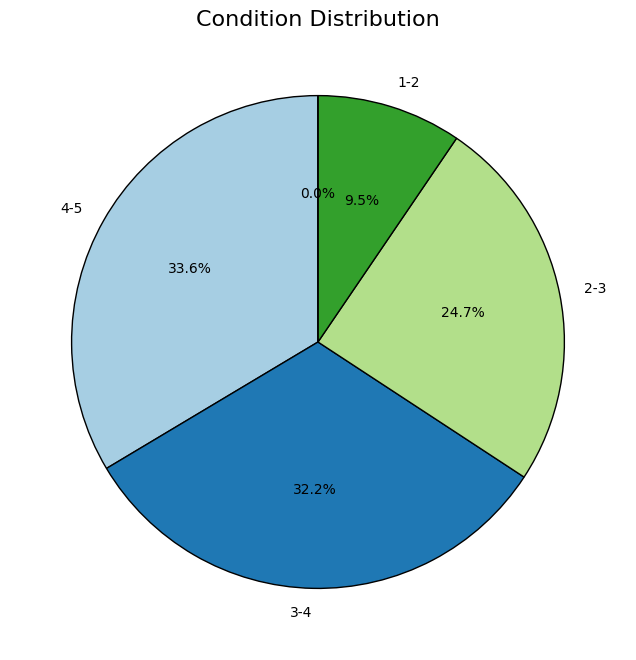

In [71]:
# Plot to visualize Condition Distribution

condition_bins = [0, 1, 2, 3, 4, 5]
condition_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]
data['condition_range'] = pd.cut(data['condition'], bins=condition_bins, labels=condition_labels, right=False)

condition_counts = data['condition_range'].value_counts()

plt.figure(figsize=(8, 8))
condition_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Condition Distribution', fontsize=16)
plt.ylabel('') 
plt.show()

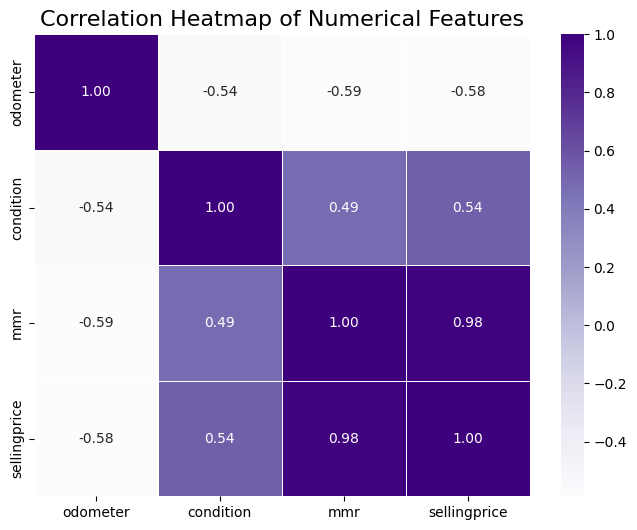

In [72]:
# Plot to explore Correlation Heatmap of Numerical Features

numerical_features = ['odometer', 'condition', 'mmr', 'sellingprice']
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

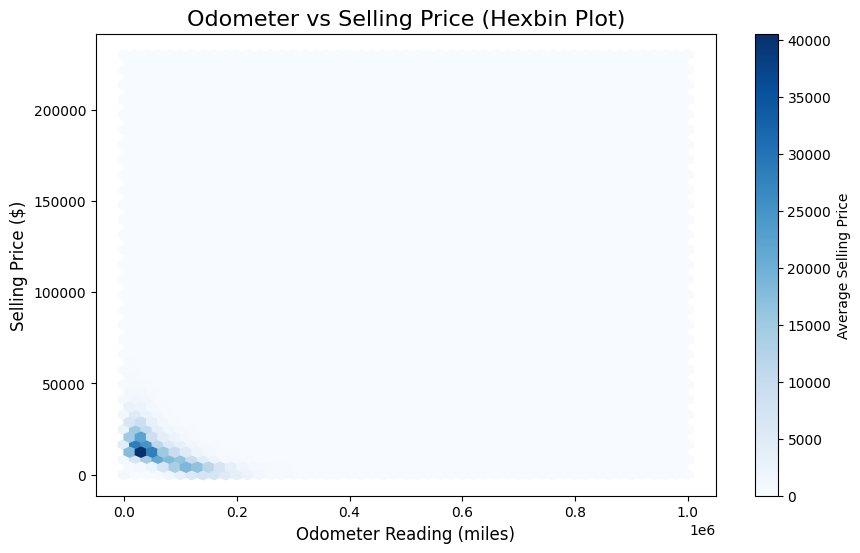

In [73]:
# Hexbin Plot to visualize Distribution of Odometer vs Selling Price

plt.figure(figsize=(10, 6))

plt.hexbin(data['odometer'], data['sellingprice'], gridsize=50, cmap='Blues', reduce_C_function=np.mean)

plt.colorbar(label='Average Selling Price')
plt.title('Odometer vs Selling Price (Hexbin Plot)', fontsize=16)
plt.xlabel('Odometer Reading (miles)', fontsize=12)
plt.ylabel('Selling Price ($)', fontsize=12)
plt.show()


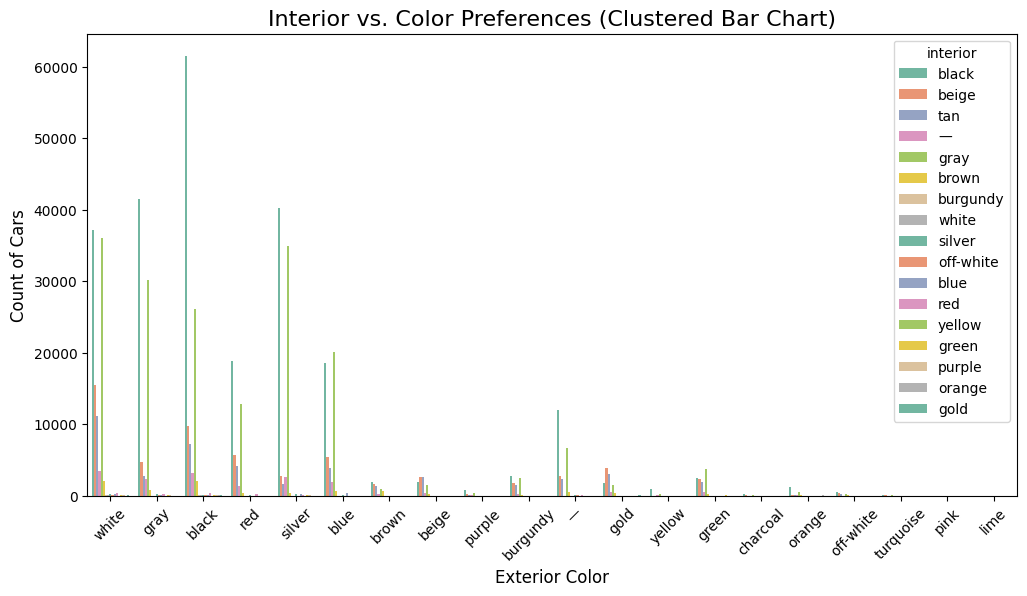

In [74]:
# Count Plot to visualize Interior vs. Color Preferences

plt.figure(figsize=(12, 6))
sns.countplot(x='color', hue='interior', data=data, palette='Set2')

plt.title('Interior vs. Color Preferences (Clustered Bar Chart)', fontsize=16)
plt.xlabel('Exterior Color', fontsize=12)
plt.ylabel('Count of Cars', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


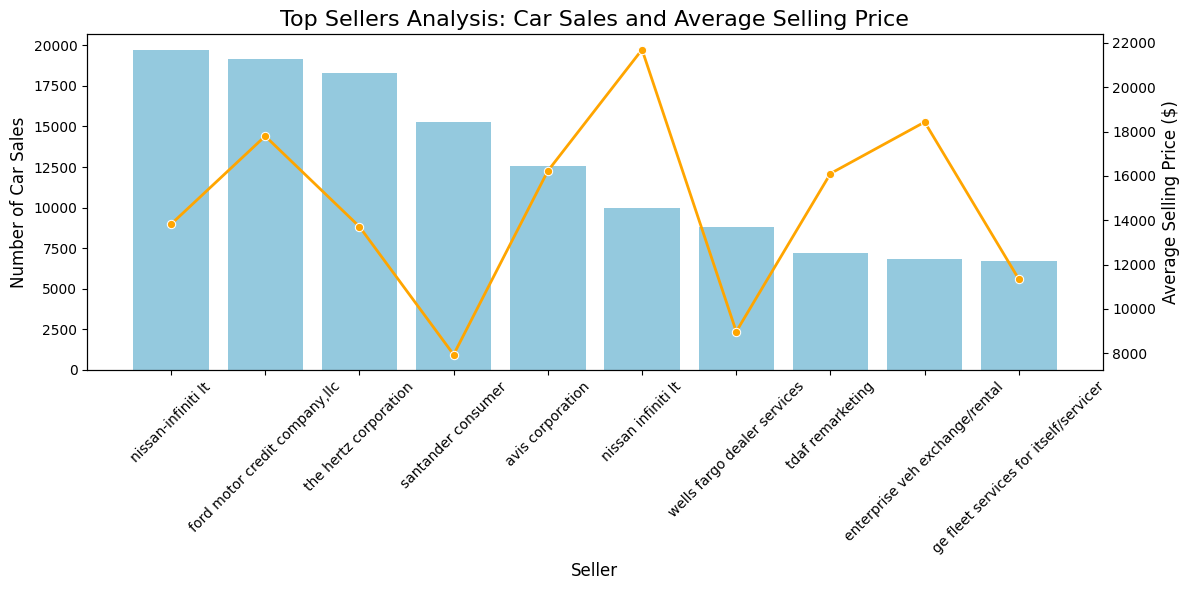

In [75]:
# plot to compare Car Sales and Average Selling Price

seller_sales = data.groupby('seller').agg(
    car_sales=('seller', 'size'),
    avg_sellingprice=('sellingprice', 'mean')
).reset_index()

top_sellers = seller_sales.sort_values(by='car_sales', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='seller', y='car_sales', data=top_sellers, ax=ax1, color='skyblue')
ax1.set_xlabel('Seller', fontsize=12)
ax1.set_ylabel('Number of Car Sales', fontsize=12)
ax1.set_title('Top Sellers Analysis: Car Sales and Average Selling Price', fontsize=16)
ax1.tick_params(axis='x', rotation=45) 

ax2 = ax1.twinx()
sns.lineplot(x='seller', y='avg_sellingprice', data=top_sellers, ax=ax2, color='orange', marker='o', linewidth=2)
ax2.set_ylabel('Average Selling Price ($)', fontsize=12)

plt.tight_layout()
plt.show()


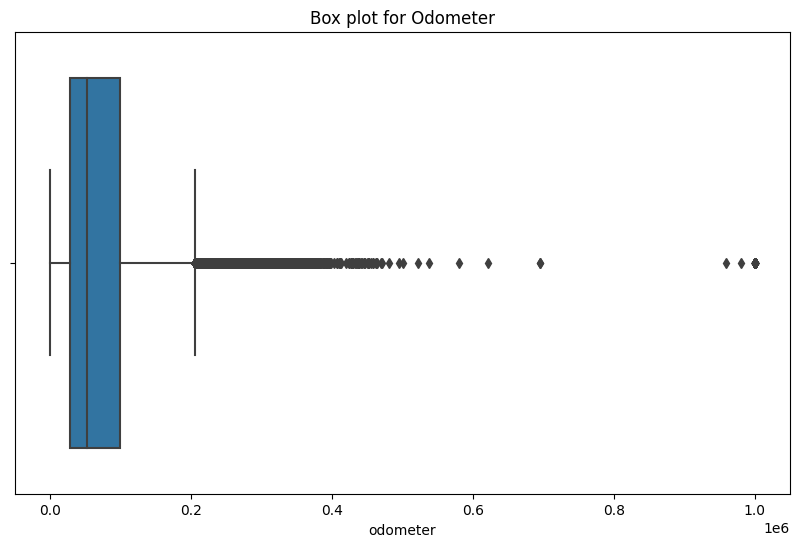

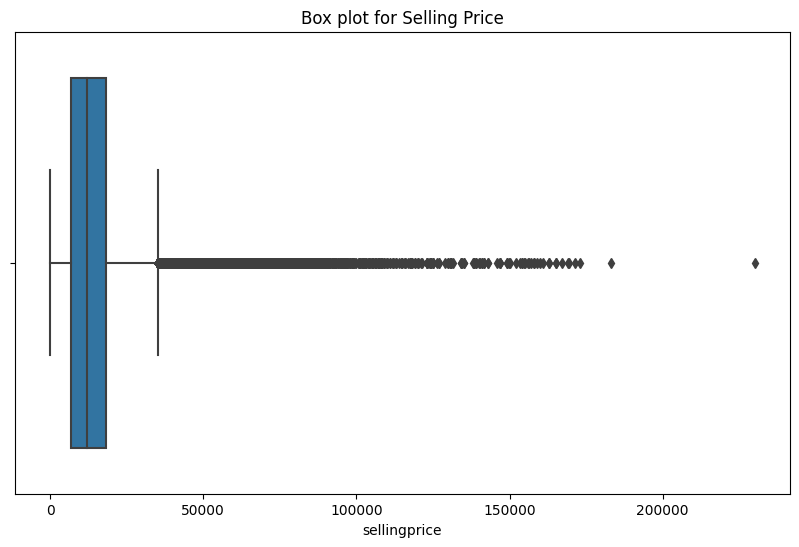

In [9]:
# Outlier Detection with Box Plots and Z-Scores

# Box plot for 'odometer' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['odometer'])
plt.title('Box plot for Odometer')
plt.show()

# Box plot for 'sellingprice' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sellingprice'])
plt.title('Box plot for Selling Price')
plt.show()

# Data Preprocessing

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
saleyear            0
salemonth           0
dtype: int64


In [9]:
# Percentage of missing values

missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

year             0.000000
make             1.843378
model            1.860915
trim             1.906011
body             2.361263
transmission    11.695010
vin              0.000000
state            0.000000
condition        2.110553
odometer         0.016821
color            0.134035
interior         0.134035
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
saleyear         0.000000
salemonth        0.000000
dtype: float64


In [10]:
# Columns with missing values

columns_with_missing = data.columns[data.isnull().any()]
print(columns_with_missing)

Index(['make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior'],
      dtype='object')


In [11]:
# Rows with missing data in a specific column

missing_rows = data[data['make'].isnull()]
missing_rows.shape

(10301, 18)

In [12]:
# Dropping rows where both 'make' and 'model' are missing

data = data.dropna(subset=['make', 'model'], how='all')

In [13]:
# for numerical category we are filling missing values with mean 

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    if data[col].isnull().sum() > 0: 
        data[col].fillna(data[col].mean(), inplace=True)

print(data.isnull().sum())

/tmp/ipykernel_166/3724759605.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


year                0
make                0
model              98
trim              350
body             2894
transmission    63592
vin                 0
state               0
condition           0
odometer            0
color             734
interior          734
seller              0
mmr                 0
sellingprice        0
saledate            0
saleyear            0
salemonth           0
dtype: int64


In [15]:
# filling categorical missing values with NA / Mode

data['model'].fillna('Unknown', inplace=True)
data['trim'].fillna('Unknown', inplace=True)
data['body'].fillna('Unknown', inplace=True)
data['transmission'].fillna('Unknown', inplace=True)

data['color'].fillna(data['color'].mode()[0], inplace=True) 
data['interior'].fillna(data['interior'].mode()[0], inplace=True)  

In [16]:
missing_values = data.isnull().sum()
print(missing_values)

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
saleyear        0
salemonth       0
dtype: int64


In [85]:
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [17]:
from scipy.stats import zscore

# Calculate Z-scores for the numerical columns
data['odometer_zscore'] = zscore(data['odometer'])
data['sellingprice_zscore'] = zscore(data['sellingprice'])

# Check for outliers (Z-score greater than 3 or less than -3)
odometer_outliers = data[data['odometer_zscore'].abs() > 3]
sellingprice_outliers = data[data['sellingprice_zscore'].abs() > 3]

print(f"Odometer outliers: {odometer_outliers.shape[0]}")
print(f"Selling price outliers: {sellingprice_outliers.shape[0]}")

Odometer outliers: 5279
Selling price outliers: 6826


In [18]:
# Remove rows where odometer or sellingprice is an outlier (Z-score > 3 or < -3)

data = data[(data['odometer_zscore'].abs() <= 3) & (data['sellingprice_zscore'].abs() <= 3)]

In [19]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,salemonth,odometer_zscore,sellingprice_zscore
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00,2014,12,-0.961872,0.801928
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16 04:30:00+00:00,2014,12,-1.098834,0.801928
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015-01-14 20:30:00+00:00,2015,1,-1.251219,1.675656
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015-01-28 20:30:00+00:00,2015,1,-1.006423,1.444375
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,2014-12-30 04:00:00+00:00,2014,12,-1.171397,-0.287663


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536405 entries, 0 to 558810
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   year                 536405 non-null  int64              
 1   make                 536405 non-null  object             
 2   model                536405 non-null  object             
 3   trim                 536405 non-null  object             
 4   body                 536405 non-null  object             
 5   transmission         536405 non-null  object             
 6   vin                  536405 non-null  object             
 7   state                536405 non-null  object             
 8   condition            536405 non-null  float64            
 9   odometer             536405 non-null  float64            
 10  color                536405 non-null  object             
 11  interior             536405 non-null  object             
 12  seller 

# Feature Engineering

In [20]:
data.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saleyear,salemonth,odometer_zscore,sellingprice_zscore
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00,2014,12,-0.961872,0.801928
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014-12-16 04:30:00+00:00,2014,12,-1.098834,0.801928
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015-01-14 20:30:00+00:00,2015,1,-1.251219,1.675656
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015-01-28 20:30:00+00:00,2015,1,-1.006423,1.444375
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,2014-12-30 04:00:00+00:00,2014,12,-1.171397,-0.287663


In [21]:
# Removing unwanted column

data = data.drop(columns=['vin','saledate','odometer_zscore','sellingprice_zscore'])
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014,12
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014,12
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015,1
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015,1
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,2014,12


In [22]:
data.make = data.make.str.lower()
data.model = data.model.str.lower()
data.body = data.body.str.lower()

In [26]:
data.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saleyear,salemonth
0,2015,kia,sorento,LX,suv,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,2014,12
1,2015,kia,sorento,LX,suv,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,2014,12
2,2014,bmw,3 series,328i SULEV,sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,2015,1
3,2015,volvo,s60,T5,sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,2015,1
5,2015,nissan,altima,2.5 S,sedan,automatic,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,2014,12


In [94]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

# high_cardinality_columns = ['make', 'model', 'trim','body','transmission','state', 'color','interior', 'seller']  
# for col in high_cardinality_columns:
#     data[col] = le.fit_transform(data[col].fillna('Unknown'))

In [95]:
# X = data.drop(columns=['sellingprice'])  
# y = data['sellingprice'] 

In [96]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(n_estimators=500, random_state=0)
# rf.fit(X, y)

In [97]:
# importances = pd.Series(rf.feature_importances_, index=X.columns)
# importances.sort_values(ascending=False).plot.barh(figsize=(8,6))
# plt.gca().invert_yaxis(); plt.title("Mean decrease in impurity"); plt.show()

In [98]:
# print(f"Feature Importances:\n{importances.sort_values(ascending=False)}")

In [23]:
data = data.drop(columns=['year','trim','transmission','state','color','interior','seller','mmr','salemonth'])
data.head()

,make,model,body,condition,odometer,sellingprice,saleyear
0,kia,sorento,suv,5.0,16639.0,21500,2014
1,kia,sorento,suv,5.0,9393.0,21500,2014
2,bmw,3 series,sedan,4.5,1331.0,30000,2015
3,volvo,s60,sedan,4.1,14282.0,27750,2015
5,nissan,altima,sedan,1.0,5554.0,10900,2014


In [24]:
data.shape

(536405, 7)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

high_cardinality_columns = ['make','model','body']  
for col in high_cardinality_columns:
    data[col] = le.fit_transform(data[col].fillna('Unknown'))

In [26]:
X = data.drop(columns=['sellingprice'])  
y = data['sellingprice'] 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [37]:
y_pred = model.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2062.8722935632372
Root Mean Squared Error (RMSE): 3030.9160548329323
R-squared (R²): 0.8681836889860721


In [30]:
model = RandomForestRegressor(n_estimators=500, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [31]:
y_pred = model.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2056.1274098842405
Root Mean Squared Error (RMSE): 3021.8128411482653
R-squared (R²): 0.8689743080760554


In [39]:
!pip install optuna

In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def objective(trial):
    # Decide whether to use max_depth or not
    use_max_depth = trial.suggest_categorical('use_max_depth', [True, False])
    if use_max_depth:
        max_depth = trial.suggest_int('max_depth', 30, 50)
    else:
        max_depth = None

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': max_depth,
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 0.01),
        'n_jobs': -1,
    }

    model = RandomForestRegressor(**params)

    # Cross-validated RMSE
    score = cross_val_score(
        model, X_train, y_train,
        scoring='neg_root_mean_squared_error',
        cv=3, n_jobs=-1
    )

    return -score.mean()  # convert back to positive RMSE

# Run the Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10, timeout=600)

# Best result
print("Best trial:")
print(f"  RMSE: {study.best_value:.4f}")
print("  Params:")
for key, val in study.best_params.items():
    print(f"    {key}: {val}")


[I 2025-07-09 15:31:34,311] A new study created in memory with name: no-name-6d02591a-985c-4aec-aa29-9171caf7d198


In [30]:
import xgboost as xgb
from xgboost import XGBRegressor

In [34]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred = xgb.predict(X_test)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2058.6941583543457
Root Mean Squared Error (RMSE): 2985.2215861957657
R-squared (R²): 0.8721282868230869


In [41]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 5, 10, 30),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'objective': 'reg:squarederror'
    }

    model = XGBRegressor(**params)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    return -scores.mean()

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

# Show best parameters
print("Best parameters:", study.best_params)

# Train final model
best_model = XGBRegressor(**study.best_params)
best_model.fit(X_train, y_train)

# Evaluate
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Validation RMSE: {rmse:.4f}")

[I 2025-07-09 15:16:10,680] A new study created in memory with name: no-name-4260237c-2e6d-4da9-bbff-19ba2e328ff0
/tmp/ipykernel_35/1753644821.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be given as keyword arguments.
  'max_depth': trial.suggest_int('max_depth', 5, 10, 30),
/usr/local/lib/python3.11/dist-packages/optuna/distributions.py:699: UserWarning: The distribution is specified by [5, 10] and step=30, but the range is not divisible by `step`. It will be replaced by [5, 5].
  warnings.warn(
[I 2025-07-09 15:16:21,533] Trial 0 finished with value: 9965949.90763648 and parameters: {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.053124338738069925, 'gamma': 1.2364423891150444, 'reg_alpha': 0.05868562215991535, 'reg_lambda': 0.12723322361414624}. Best is trial 0 with value: 9965949.90763648.
/tmp/ipykernel_35/1753644821.py:7: FutureWarning: suggest_int() got {'step'} as positional arguments but they were expected to be gi

Best parameters: {'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.21089337527955218, 'gamma': 0.1456975148368702, 'reg_alpha': 0.9975864289107528, 'reg_lambda': 0.026581281376139243}
Validation RMSE: 2857.2251


In [42]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1943.3855143822245
Root Mean Squared Error (RMSE): 2857.225067650738
R-squared (R²): 0.8828586457651234


In [43]:
import joblib
joblib.dump(best_model, "xgb_best_model.pkl")

['xgb_best_model.pkl']

In [32]:
xgb = XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.21, gamma=0.15, reg_alpha=0.99, reg_lambda=0.026)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.15, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.21, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred = xgb.predict(X_test)

In [35]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 1946.9980381971013
Root Mean Squared Error (RMSE): 2859.183425871645
R-squared (R²): 0.8826980120409388
